# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

Projekt korzysta z szeregu bibliotek:
- TensorFlow i Keras – do budowy i trenowania sieci neuronowych.
- NumPy i Pandas – do manipulacji i analizy danych.
- sklearn – do podziału zbioru danych, normalizacji oraz ewaluacji modeli.
- Matplotlib i Seaborn – do wizualizacji wyników.

Te narzędzia umożliwiają kompleksowe przetwarzanie danych i implementację regresji w celu przewidywania zawartości alkoholu w piwie (ABV – Alcohol By Volume).

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Przygotowanie Danych
Wczytanie i przygotowanie danych treningowych, normalizacja danych, podział na zbiór treningowy i testowy.

Dane zostały załadowane z pliku CSV i poddane wstępnemu przetwarzaniu:

- Wybór numerycznych kolumn takich jak Size(L), OG, FG, IBU, itp., które są potencjalnie istotne dla przewidywania ABV.
- Uzupełnienie brakujących wartości poprzez wypełnienie średnią dla każdej kolumny.
- Normalizacja danych za pomocą StandardScaler, aby przyspieszyć i ustabilizować proces trenowania.
- Podział na zbiory treningowy i testowy – 80% danych do trenowania i 20% do testowania.

In [28]:
data = pd.read_csv('../data.csv')

numeric_columns = ['Size(L)', 'OG', 'FG', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = data[numeric_columns].copy()

X = X.fillna(X.mean())

y = data['ABV'].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 9)
Kształt danych testowych: (14773, 9)
Kształt etykiet treningowych: (59088,)
Kształt etykiet testowych: (14773,)


# Utworzenie Modelu

Model jest wielowarstwową siecią neuronową z następującymi warstwami:

- Warstwy Dense – gęsto połączone warstwy z aktywacją ReLU.
- Batch Normalization – stabilizuje i przyspiesza uczenie, redukując wewnętrzne zmiany w rozkładach danych.
- Dropout – regularizacja, która zapobiega przeuczeniu przez losowe wyłączanie neuronów.
- Warstwa wyjściowa – pojedynczy neuron do regresji, bez funkcji aktywacji.

Kompilacja modelu wykorzystuje:

- Optymalizator: Adam (szybkość uczenia = 0.001).
- Mean Squared Error (MSE) jako funkcję straty.
- Mean Absolute Error (MAE) jako dodatkową metrykę oceny.

In [29]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa wejściowa
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error']) 

model.summary()  

C:\Users\kubal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,745 (186.50 KB)

 Trainable params: 46,785 (182.75 KB)

 Non-trainable params: 960 (3.75 KB)

# Trenowanie modelu
Callbacki użyte w trenowaniu:
- EarlyStopping – monitoruje val_loss, zatrzymując trening, jeśli przez 10 epok nie ma poprawy. Przywraca najlepsze wagi.
- ReduceLROnPlateau – zmniejsza współczynnik uczenia o 20%, gdy val_loss nie poprawia się przez 5 epok, minimalny learning rate to 0.0001.

Proces trenowania:
- Maksymalna liczba epok: 100.
- Batch size: 16, co przyspiesza trening i stabilizuje obliczenia.
- 20% danych treningowych używane jako zbiór walidacyjny.
- Callbacki optymalizują proces trenowania i zapobiegają przeuczeniu.

Epoch 1/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 16.2994 - mean_absolute_error: 3.0850 - val_loss: 2.8961 - val_mean_absolute_error: 1.0593 - learning_rate: 0.0010
Epoch 2/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.2323 - mean_absolute_error: 1.3664 - val_loss: 2.8050 - val_mean_absolute_error: 1.0509 - learning_rate: 0.0010
Epoch 3/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.4428 - mean_absolute_error: 1.2536 - val_loss: 2.6902 - val_mean_absolute_error: 1.0262 - learning_rate: 0.0010
Epoch 4/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 3.1186 - mean_absolute_error: 1.1505 - val_loss: 1.0888 - val_mean_absolute_error: 0.6167 - learning_rate: 0.0010
Epoch 5/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.9810 - mean_absolute_error: 0.9158 - val_loss: 0.7522 - val_mean_absolute_error: 0.4407 - learning_rate: 0.0010
Epoch 6/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.7345 - mean_absolute_error: 0.8123 - val_loss

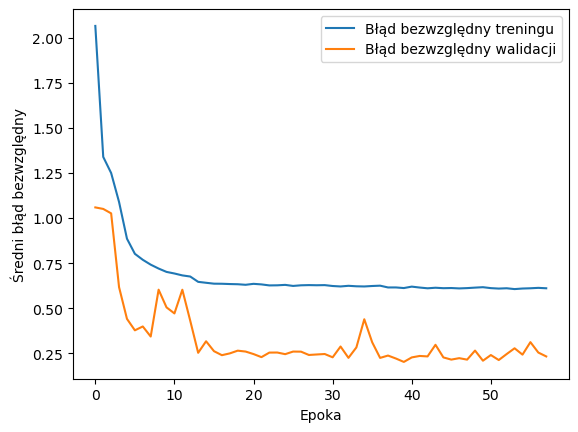

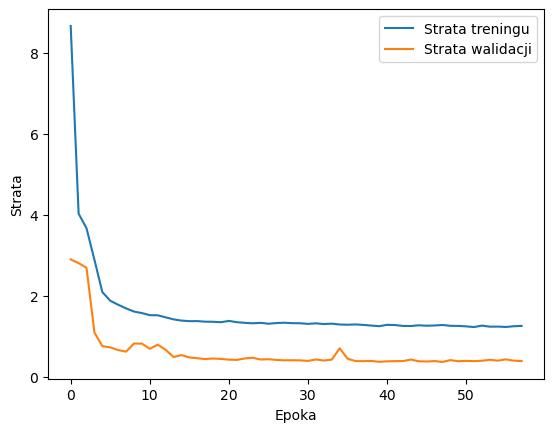

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

plt.plot(history.history['mean_absolute_error'], label='Błąd bezwzględny treningu')
plt.plot(history.history['val_mean_absolute_error'], label='Błąd bezwzględny walidacji')
plt.xlabel('Epoka')
plt.ylabel('Średni błąd bezwzględny')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Testowanie i Ewaluacja
Ocena modelu:
- model.evaluate zwraca:
  - Test Loss – średni błąd kwadratowy (MSE) na zbiorze testowym.
  - Test Mean Absolute Error (MAE) – średni błąd bezwzględny, który jest łatwiejszy do interpretacji.
  
Predykcja:
- model.predict przewiduje wartości ABV dla zbioru testowego.

Średni błąd kwadratowy:
- Obliczany za pomocą mean_squared_error, wskazuje na średni rozrzut przewidywań wokół wartości rzeczywistych.

Wykres rzeczywistych vs przewidywanych wartości:
- Wykres punktowy (scatter plot) przedstawia zgodność przewidywań modelu z rzeczywistymi wartościami ABV.

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1520 - mean_absolute_error: 0.2088
Test Loss: 0.33563581109046936
Test Mean Absolute Error: 0.22145940363407135
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.33563581333192155


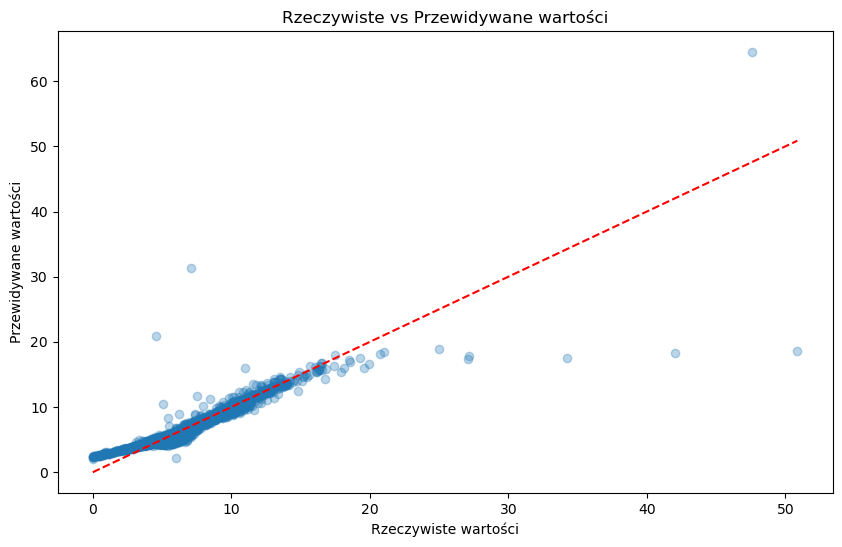

In [31]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Mean Absolute Error: {test_mae}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()

# Zapisywanie i Wczytywanie Modelu
Zapisywanie modelu:
- Model zapisano w formacie .h5 za pomocą model.save, co pozwala na późniejsze użycie bez konieczności ponownego trenowania.

Wczytywanie modelu:
- Model wczytano za pomocą keras.models.load_model i ponownie oceniono na zbiorze testowym.

Ocena wczytanego modelu:
- Test Loss i Test MAE potwierdzają, że zapisany model zachował swoje właściwości i może być używany do predykcji.

In [32]:
model.save('../models/model_regresji_alkoholu.h5')

loaded_model = keras.models.load_model('../models/model_regresji_alkoholu.h5')

loaded_model.summary()

loaded_test_loss, loaded_test_mae = loaded_model.evaluate(X_test, y_test)

print(f'Loaded Test Loss: {loaded_test_loss}')
print(f'Loaded Test Mean Absolute Error: {loaded_test_mae}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,747 (186.52 KB)

 Trainable params: 46,785 (182.75 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1520 - mean_absolute_error: 0.2088
Loaded Test Loss: 0.33563581109046936
Loaded Test Mean Absolute Error: 0.22145940363407135


# Przewidywanie zawartości alkoholu dla stylów piwa
Wczytanie danych:
- Wczytano rzeczywiste dane treningowe z pliku CSV, by dopasować skaler do danych wejściowych.

Normalizacja:
- Dane wejściowe są skalowane za pomocą StandardScaler, by były zgodne z danymi użytymi w treningu.

Funkcja przewiduj_zawartosc_alkoholu:
- Przyjmuje dane piwa jako słownik.
- Normalizuje je, a następnie używa wczytanego modelu do predykcji zawartości alkoholu.

In [33]:
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd

model = keras.models.load_model('../models/model_regresji_alkoholu.h5')

dane_treningowe = pd.read_csv('../data.csv')

numeric_columns = ['Size(L)', 'OG', 'FG', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
dane_treningowe = dane_treningowe[numeric_columns]

dane_treningowe = dane_treningowe.fillna(dane_treningowe.mean())

scaler = StandardScaler()
scaler.fit(dane_treningowe)

def przewiduj_zawartosc_alkoholu(dane_piwa):
    df = pd.DataFrame([dane_piwa])
    
    df_scaled = scaler.transform(df)
    
    predykcja = model.predict(df_scaled)
    
    return predykcja[0][0]

piwa = {
    'IPA': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.015, 'IBU': 60, 'Color': 10, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75},
    'Stout': {'Size(L)': 20.0, 'OG': 1.075, 'FG': 1.020, 'IBU': 40, 'Color': 40, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.070, 'Efficiency': 75},
    'Pilsner': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 30, 'Color': 5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Wheat': {'Size(L)': 20.0, 'OG': 1.055, 'FG': 1.012, 'IBU': 20, 'Color': 8, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.050, 'Efficiency': 75},
    'APA': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 35, 'Color': 10, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Barleywine': {'Size(L)': 20.0, 'OG': 1.100, 'FG': 1.025, 'IBU': 80, 'Color': 20, 'BoilSize': 25.0, 'BoilTime': 90, 'BoilGravity': 1.095, 'Efficiency': 75},
    'Saison': {'Size(L)': 20.0, 'OG': 1.060, 'FG': 1.008, 'IBU': 25, 'Color': 7, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.055, 'Efficiency': 75},
    'Porter': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.018, 'IBU': 35, 'Color': 30, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75}
}

for styl, dane_piwa in piwa.items():
    zawartosc_alkoholu = przewiduj_zawartosc_alkoholu(dane_piwa)
    print(f'Styl: {styl}, Przewidywana zawartość alkoholu: {zawartosc_alkoholu:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Styl: IPA, Przewidywana zawartość alkoholu: 6.45%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Styl: Stout, Przewidywana zawartość alkoholu: 6.93%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Styl: Pilsner, Przewidywana zawartość alkoholu: 5.26%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Styl: Wheat, Przewidywana zawartość alkoholu: 5.55%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Styl: APA, Przewidywana zawartość alkoholu: 5.21%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Styl: Barleywine, Przewidywana zawartość alkoholu: 9.86%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Styl: Saison, Przewidywana zawartość alkoholu: 6.80%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Styl: Porter, Przewidywana zawartość alkoholu: 5.88%
